In [13]:
!pip install polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 6.6 MB/s eta 0:00:0000:0100:01m


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl

In [ ]:
path1 = '/Users/danilapertsev/Desktop/хакатон/ga_hits.csv'
path2 = '/Users/danilapertsev/Desktop/хакатон/ga_sessions.csv'

In [2]:
data_hits = pd.read_csv(path1)
pdata_hits = pl.read_csv(path1)

In [192]:
data_sessions = pd.read_csv(path2)

/var/folders/qz/_x5vm_s15jl120pgn0vcdg500000gn/T/ipykernel_8166/4007546835.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_sessions = pd.read_csv('/Users/danilapertsev/Desktop/хакатон/ga_sessions.csv')


#  Работа с датасетом действий

**Описание колонок в `ga_hits.csv`:**

- `session_id` — ID визита  
- `hit_date` — дата события  
- `hit_time` — время события  
- `hit_number` — порядковый номер события в рамках сессии  
- `hit_type` — тип события  
- `hit_referer` — источник события  
- `hit_page_path` — страница события  
- `event_category` — тип действия  
- `event_action` — действие  
- `event_label` — тег действия  
- `event_value` — значение результата действия


In [4]:
data_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [5]:
data_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [6]:
print(data_hits.shape)
pdata_hits = pdata_hits.unique()
print(data_hits.shape)

(15726470, 11)
(15726470, 11)


In [8]:
missing_pct = pdata_hits.null_count()/pdata_hits.shape[0] * 100
print(missing_pct)

shape: (1, 11)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ session_i ┆ hit_date ┆ hit_time  ┆ hit_numbe ┆ … ┆ event_cat ┆ event_act ┆ event_lab ┆ event_val │
│ d         ┆ ---      ┆ ---       ┆ r         ┆   ┆ egory     ┆ ion       ┆ el        ┆ ue        │
│ ---       ┆ f64      ┆ f64       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ f64       ┆          ┆           ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0       ┆ 0.0      ┆ 58.247795 ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 23.909905 ┆ 100.0     │
└───────────┴──────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘


#### Удалим столбцы, где процент больше 50 и заменим пропуски "n/a" в остальных случаях

In [15]:
col_for_remove = []
for col in missing_pct.columns:
    if missing_pct[col].item() > 50:
        col_for_remove.append(col)

pdata_hits = pdata_hits.drop(col_for_remove)
pdata_hits = pdata_hits.fill_null("n/a")

In [17]:
pdata_hits.null_count()/pdata_hits.shape[0] * 100


session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Рассмотрим количество классов и действий по ним

In [26]:
event_action = pdata_hits["event_action"].value_counts().sort('count',descending=True)

#### топ 10 самых популярных действий:

In [28]:
event_action[:10]

event_action,count
str,u32
"""view_card""",3558985
"""view_new_card""",3551009
"""sub_landing""",1798117
"""go_to_car_card""",973666
"""sub_view_cars_click""",791515
"""search_form_region""",512069
"""search_form_search_btn""",433748
"""sap_search_form_cost_to""",356596
"""showed_number_ads""",326274


In [40]:
df_actions_per_session = (
    pdata_hits
    .group_by("session_id")
    .agg(
        pl.count().alias("actions_count")
    )
    .sort("actions_count", descending=True)
)

/var/folders/qz/_x5vm_s15jl120pgn0vcdg500000gn/T/ipykernel_8166/3227664942.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("actions_count")


In [45]:
df_actions_per_session.median()

session_id,actions_count
str,f64
null,4.0


### Краткий вывод по ga_hits
#### Дубликатов не обнаружено, пропуски были обработаны
#### Список самых популярных действий:
- "view_card" - 3558985
- "view_new_card" - 3551009
- "sub_landing" - 1798117
- "go_to_car_card" - 973666
- "sub_view_cars_click" - 791515
- "search_form_region" - 512069
- "search_form_search_btn" - 433748
- "sap_search_form_cost_to" - 356596
- "showed_number_ads" - 326274
- "pagination_click" - 248944
#### В среднем активные пользователи свершают на сайте от 4 до 9 действий


In [59]:
comp_set = set(pdata_hits['session_id'].unique().to_pandas().tolist())

# Работа с датасетом сессий

**Описание колонок в `ga_sessions.csv`:**

- `session_id` — ID визита  
- `client_id` — ID посетителя  
- `visit_date` — дата визита  
- `visit_time` — время визита  
- `visit_number` — порядковый номер визита клиента  
- `utm_source` — канал привлечения  
- `utm_medium` — тип привлечения  
- `utm_campaign` — рекламная кампания  
- `utm_keyword` — ключевое слово  
- `device_category` — тип устройства  


In [193]:
data_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [194]:
data_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


#### Удалим столбцы, где процент больше 50 и заменим пропуски "n/a" в остальных случаях

In [195]:
print(data_sessions.shape)
data_sessions = data_sessions.drop_duplicates()
print(data_sessions.shape)

(1860042, 18)
(1860042, 18)


In [196]:
data_sessions.isna().sum()/data_sessions.shape[0] * 100

session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.005215
utm_medium                   0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_model                99.121633
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
dtype: float64

In [197]:
na_session = data_sessions.isna().sum()/data_sessions.shape[0] * 100
col_to_del = [i for i in na_session.index if na_session[i] > 50]

In [198]:
data_sessions = data_sessions.drop(col_to_del, axis = 1).fillna('n/a')

#### Добавим столбец action со значениями 0/1, при условии, что во время данной сессии было свершено любое действие 

In [199]:
data_sessions['action'] = data_sessions['session_id'].isin(comp_set).astype(int)

#### Для сохранения временных признаков разделим дату на зима, весна, лето, осень, а сутки на утро, день, вечер, ночь

In [200]:
def season_ch(month):
    month = int(month.split('-')[1])
    if 3 <= month <= 5:
        return 'spring'
    elif 6 <= month <= 8:
        return 'summer'
    elif 9 <= month <= 11:
        return 'autumn'
    else:
        return 'winter'

def daytime_ch(time):
    time = int(time.split(':')[0])
    if 0 <= time <= 5:
        return 'night'
    elif 6 <= time <= 11:
        return 'morning'
    elif 12 <= time <= 17:
        return 'day'
    else: 
        return 'evening'

In [201]:
data_sessions.visit_date = data_sessions.visit_date.apply(season_ch)  
data_sessions.visit_time = data_sessions.visit_time.apply(daytime_ch)   

#### Удалим столбцы session_id и client_id, так как для построения модели они нам не понадобятся

In [202]:
data_sessions = data_sessions.drop(['session_id', 'client_id'], axis = 1)

####  Рассмотрим единственный числовой признак visit_number на выбросы(хотя его тоже можно считать категориальным, позже переведем в объект)

Среднее значение - 2.7128043345257797
Медиана - 1.0
Максимум - 564


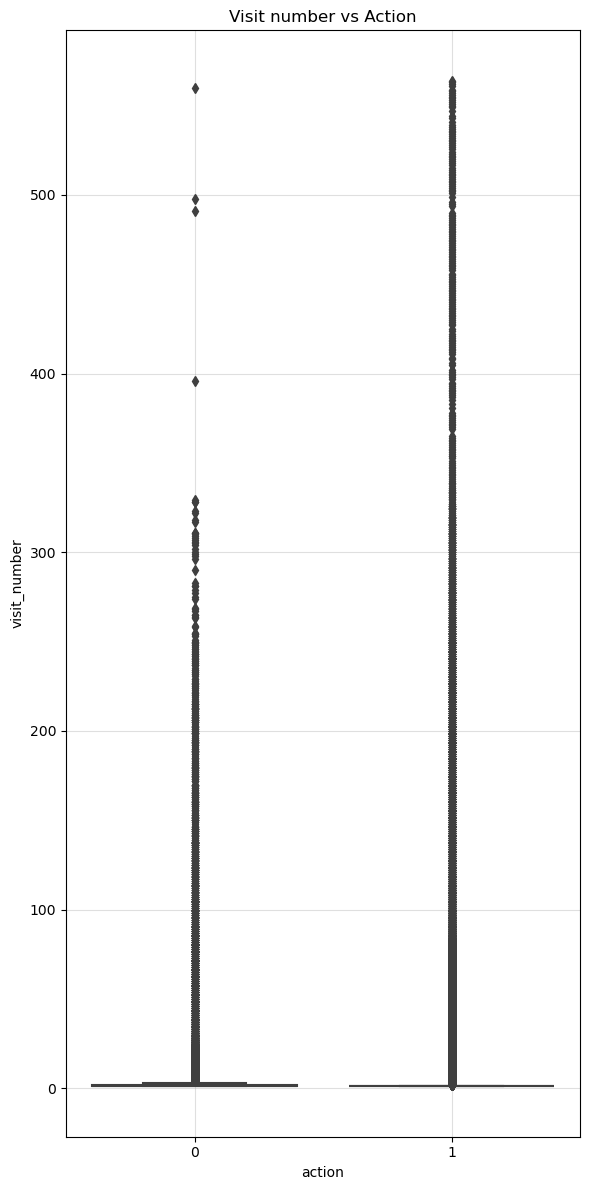

In [203]:
print(f'Среднее значение - {data_sessions["visit_number"].mean()}')
print(f'Медиана - {data_sessions["visit_number"].median()}')
print(f'Максимум - {data_sessions["visit_number"].max()}')

plt.figure(figsize=(6, 12))
sns.boxplot(x='action', y='visit_number', data=data_sessions)
plt.title("Visit number vs Action")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

#### Данные сильно разнятся, проведем их групировку, вначале выясним самые частые значения, а остальные сгрупируем в категорию right+)

In [205]:
print(data_sessions["visit_number"].quantile(0.25))
print(data_sessions["visit_number"].quantile(0.75))
iqr = (data_sessions["visit_number"].quantile(0.75) - data_sessions["visit_number"].quantile(0.25))
left = data_sessions["visit_number"].quantile(0.25) - 1.5 * iqr
right = data_sessions["visit_number"].quantile(0.75) + 1.5 * iqr
right = round(right)
data_sessions["visit_number"] = data_sessions["visit_number"].astype('object').apply(lambda x: x if int(x) <= right else f"{right}+")

1.0
2.0


#### Проведем анализ данных, поищем зависимости и построим инофрмативные графики

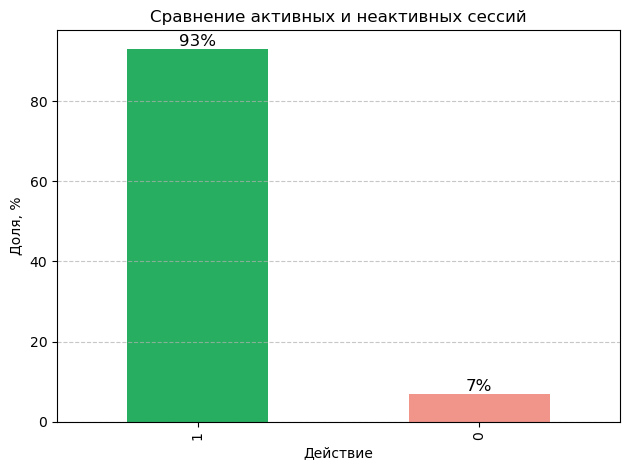

In [207]:
data = (data_sessions['action'].value_counts()/len(data_sessions['action']) * 100).round()
colors = ["#27AE60", "#F1948A"]


ax = data.plot.bar(color=colors)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xlabel("Действие")
ax.set_ylabel("Доля, %")
ax.set_title("Сравнение активных и неактивных сессий")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}%', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=12)


plt.tight_layout()
plt.show()

#### Построим соотношение наших признаков и целевого признака. Напишем фукцию захватывающую 90 % процентов значений, остальные 10% объеденим в категорию others

In [208]:
def reduce_categories_by_coverage(series, coverage=0.9):
    counts = series.value_counts(normalize=True).cumsum()
    main_categories = counts[counts <= coverage].index
    return series.where(series.isin(main_categories), other='other')

In [209]:
for col in ['utm_source', 'utm_campaign', 'utm_campaign', 'utm_adcontent', 'device_brand', 'device_screen_resolution', 'device_browser', 'geo_city']:
    data_sessions[col] = reduce_categories_by_coverage(data_sessions[col])
    # print(data_sessions[col].value_counts())

action,0,1
visit_date,,
autumn,3.54,41.46
spring,0.19,5.62
summer,1.37,26.36
winter,1.77,19.69


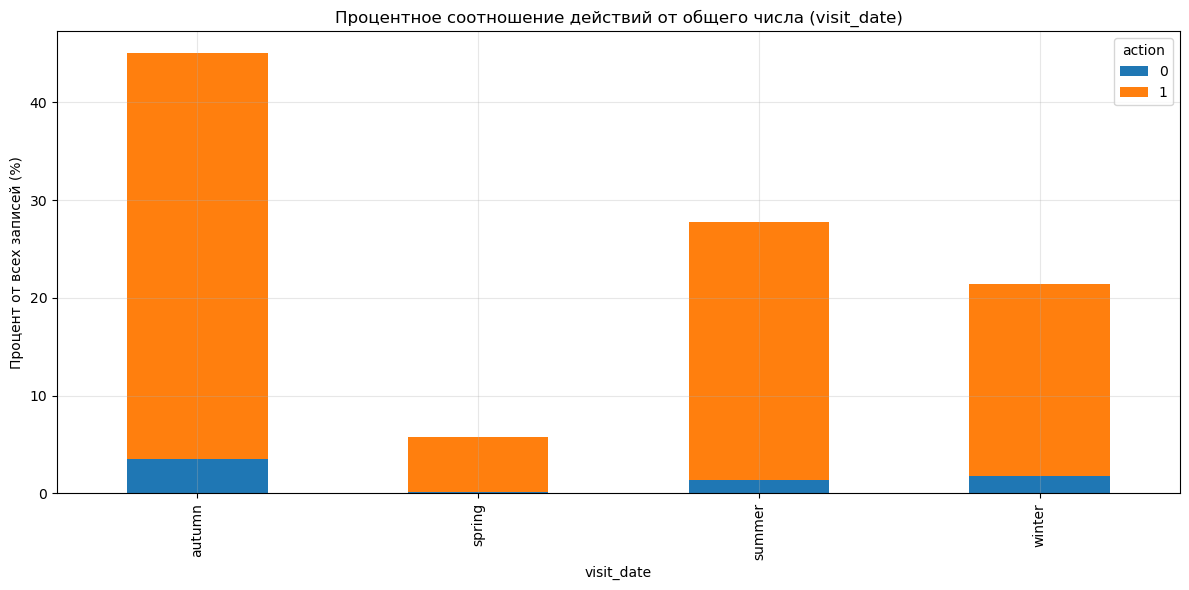

action,0,1
visit_time,,
day,2.25,31.41
evening,2.18,28.80
morning,1.77,22.82
night,0.67,10.09


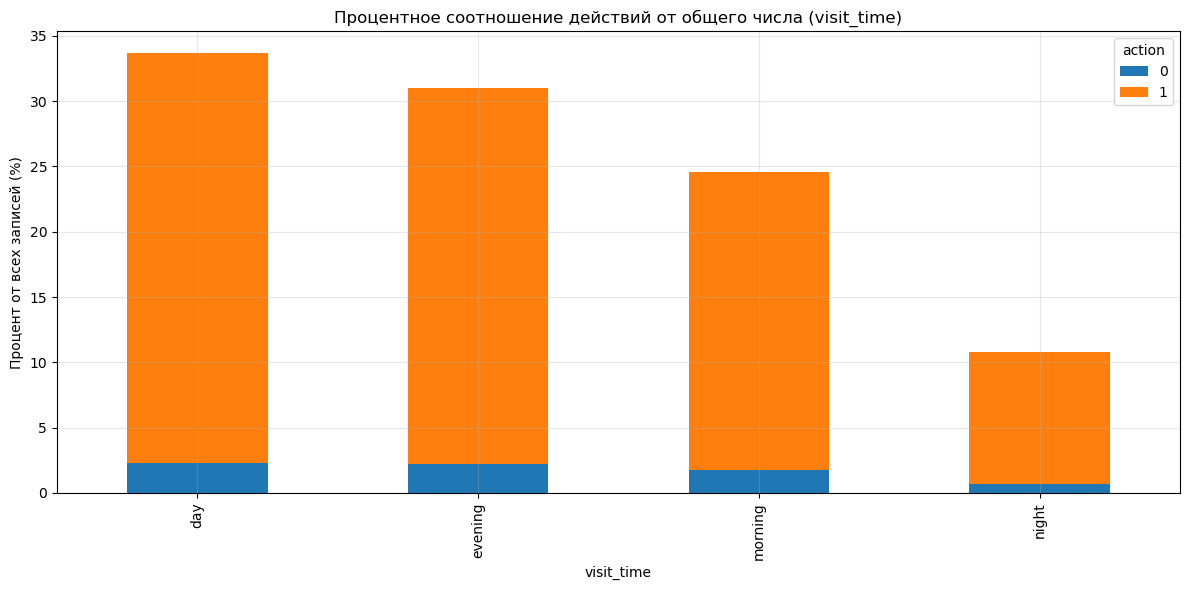

action,0,1
visit_number,,
1,4.05,69.95
2,1.26,11.41
3,0.50,3.86
4,0.27,1.97
4+,0.79,5.94


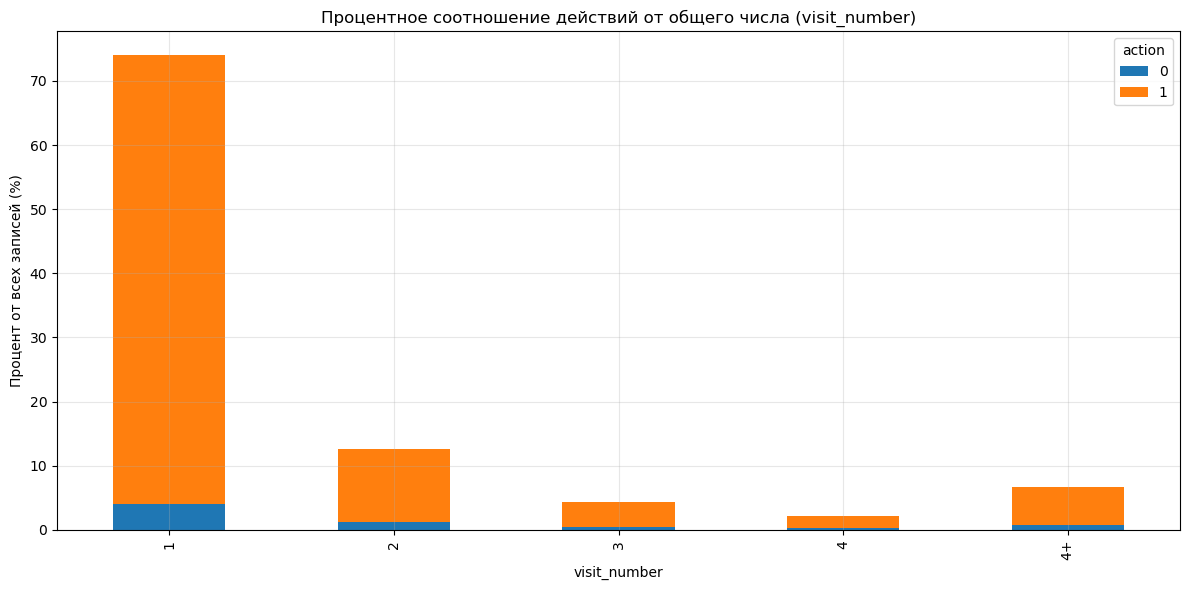

action,0,1
utm_medium,,
(none),1.26,14.90
(not set),0.00,0.02
CPM,0.00,0.00
Sbol_catalog,0.00,0.00
app,0.09,0.07
article,0.00,0.00
banner,1.46,28.24
blogger_channel,0.02,0.42
blogger_header,0.00,0.04


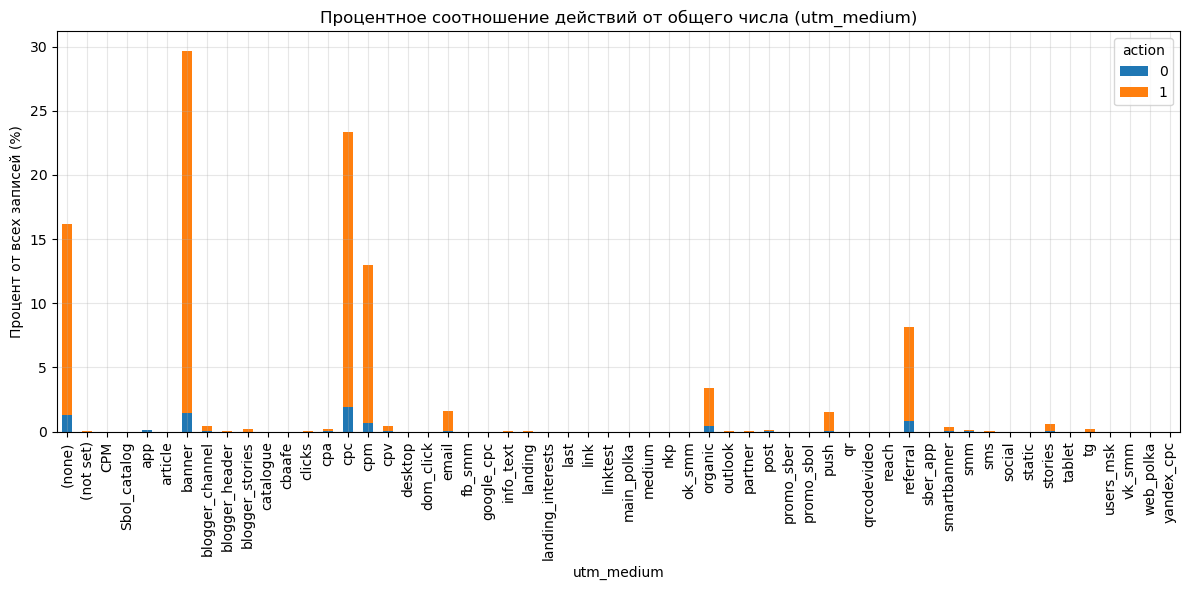

action,0,1
device_category,,
desktop,1.07,18.65
mobile,5.71,73.58
tablet,0.09,0.90


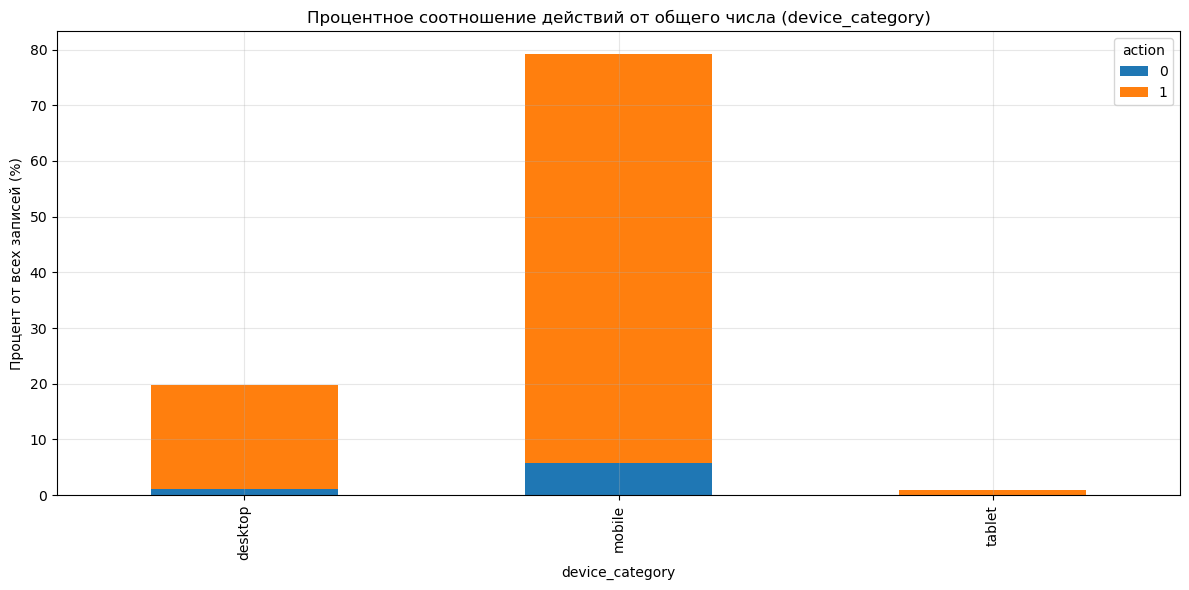

action,0,1
utm_source,,
BHcvLfOaCWvWTykYqHVe,0.29,5.97
MvfHsxITijuriZxsqZqt,0.56,9.45
QxAxdyPLuQMEcrdZWdWb,0.33,2.43
ZpYIoDJMcFzVoPFsHGJL,1.38,29.71
aXQzDWsJuGXeBXexNHjc,0.09,1.59
bByPQxmDaMXgpHeypKSM,0.64,4.86
fDLlAcSmythWSCVMvqvL,1.26,14.90
jaSOmLICuBzCFqHfBdRg,0.05,1.52
kjsLglQLzykiRbcDiGcD,1.14,13.18


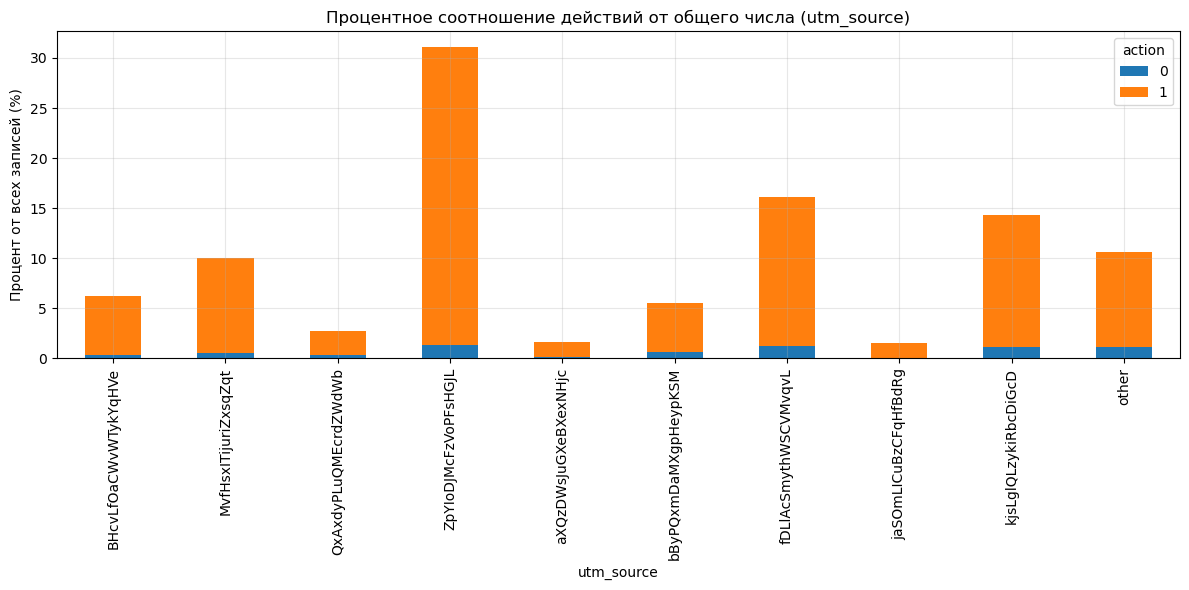

action,0,1
utm_campaign,,
FTjNLDyTrXaWYgZymFkV,0.67,12.63
LEoPHuyFvzoNfnzGgfcd,0.15,17.27
LTuZkdKfxRGVceoWkVyg,2.18,22.74
TmThBvoCcwkCZZUWACYq,0.63,0.80
XHNUiSKKGTEpSAlaVMFQ,0.04,1.28
gecBYcKZCPMcVYdSSzKP,0.04,7.16
n/a,1.31,10.50
okTXSMadDkjvntEHzIjp,0.33,0.99
other,1.53,19.76


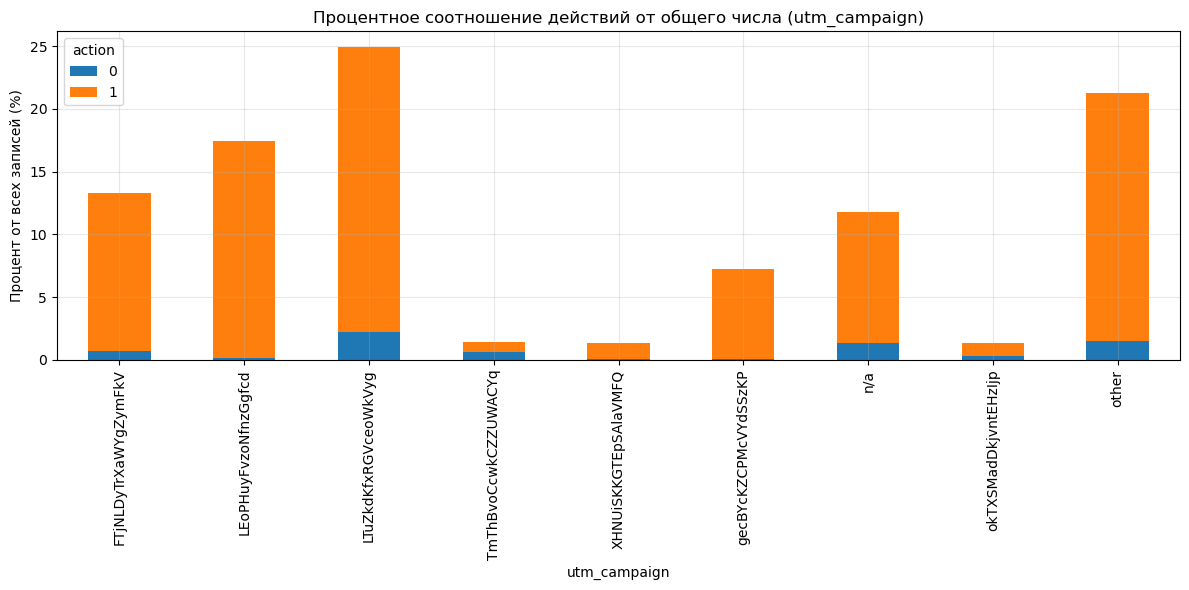

action,0,1
utm_adcontent,,
JNHcPlZPxEMWDnRiyoBf,3.83,50.29
n/a,1.69,16.35
other,0.80,11.23
vCIpmpaGBnIQhyYNkXqp,0.09,9.65
xhoenQgDQsgfEPYNPwKO,0.47,5.61


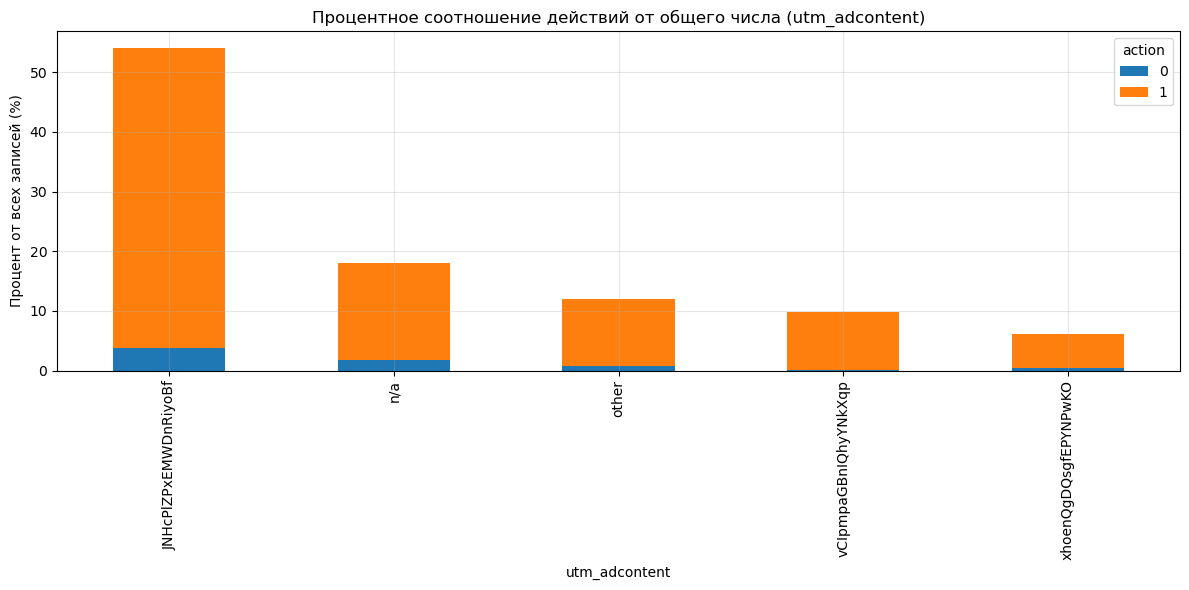

action,0,1
device_brand,,
Apple,2.56,27.07
Samsung,1.10,16.75
Xiaomi,1.03,14.48
n/a,1.07,18.67
other,1.11,16.16


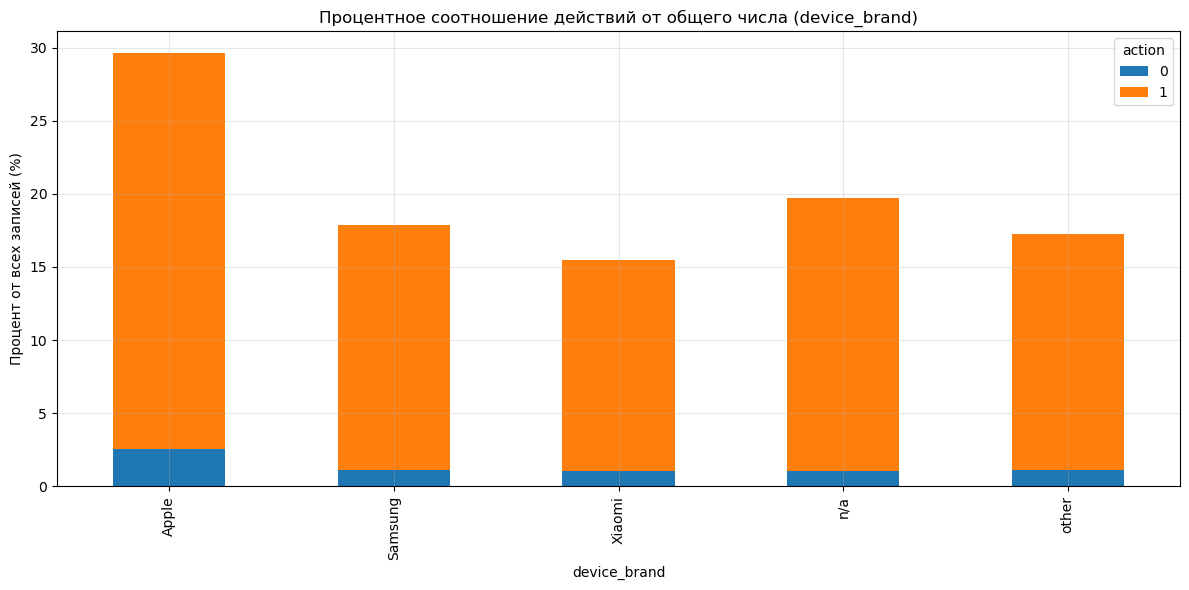

action,0,1
device_screen_resolution,,
1280x1024,0.03,0.41
1280x720,0.05,1.04
1280x800,0.02,0.37
1366x768,0.12,1.71
1440x900,0.07,1.60
1536x864,0.10,1.91
1600x900,0.03,0.66
1680x1050,0.03,0.58
1792x1120,0.02,0.40


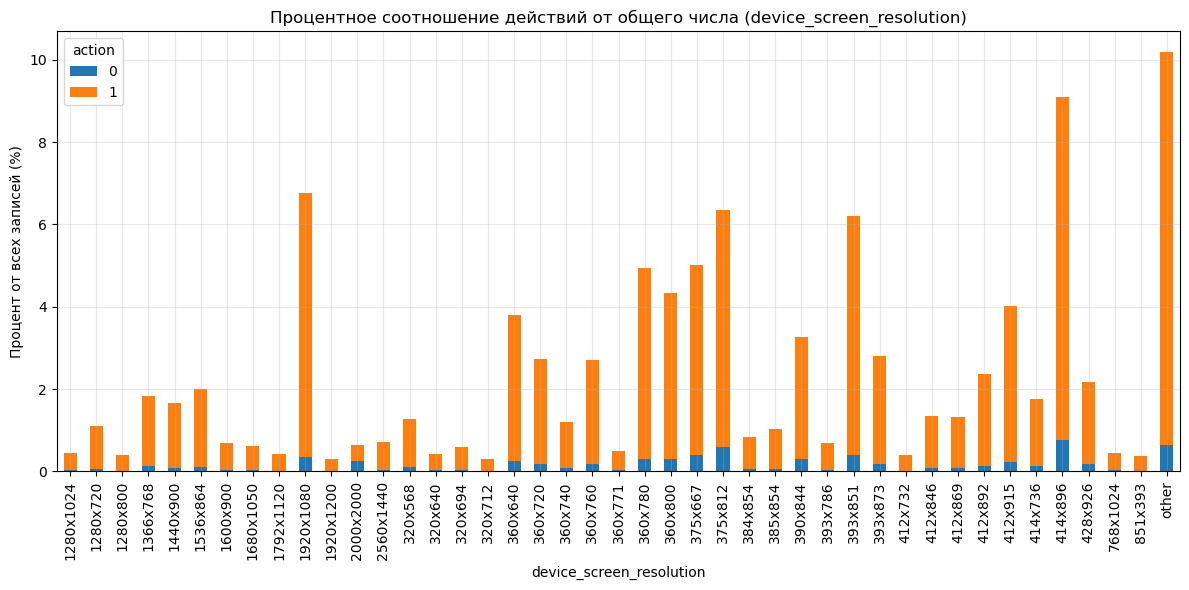

action,0,1
device_browser,,
Chrome,3.33,51.16
Safari,2.25,23.48
YaBrowser,0.51,6.65
other,0.78,11.84


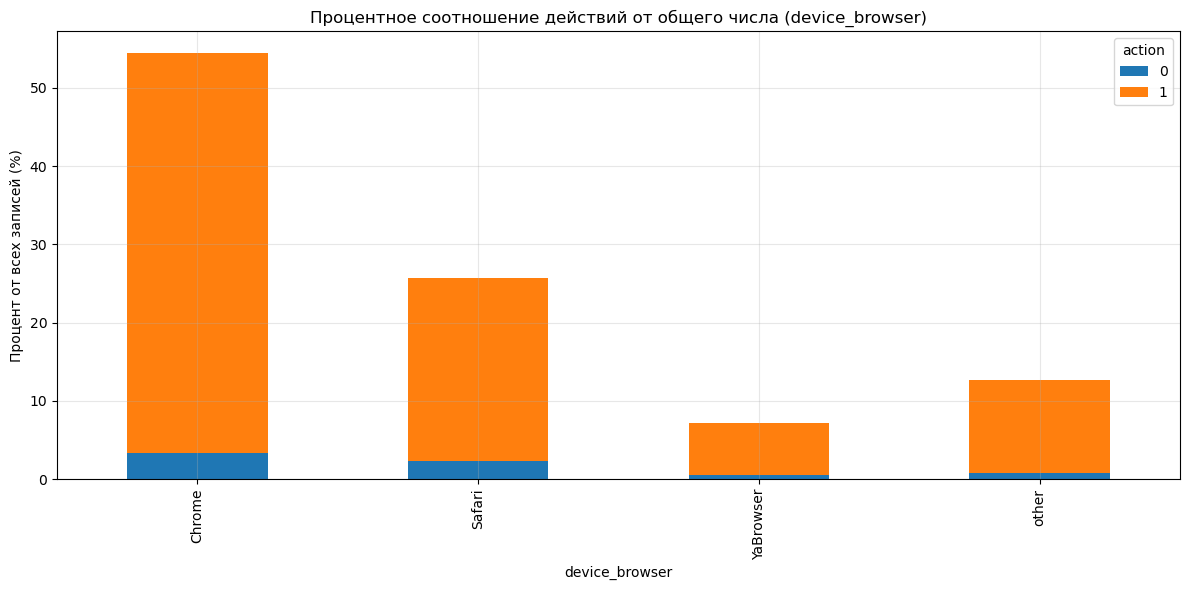

action,0,1
geo_city,,
(not set),0.26,3.94
Balashikha,0.04,0.64
Barnaul,0.01,0.15
Belgorod,0.01,0.13
Cheboksary,0.01,0.12
...,...,...
Voronezh,0.06,0.68
Yaroslavl,0.04,0.49
Yekaterinburg,0.12,1.80


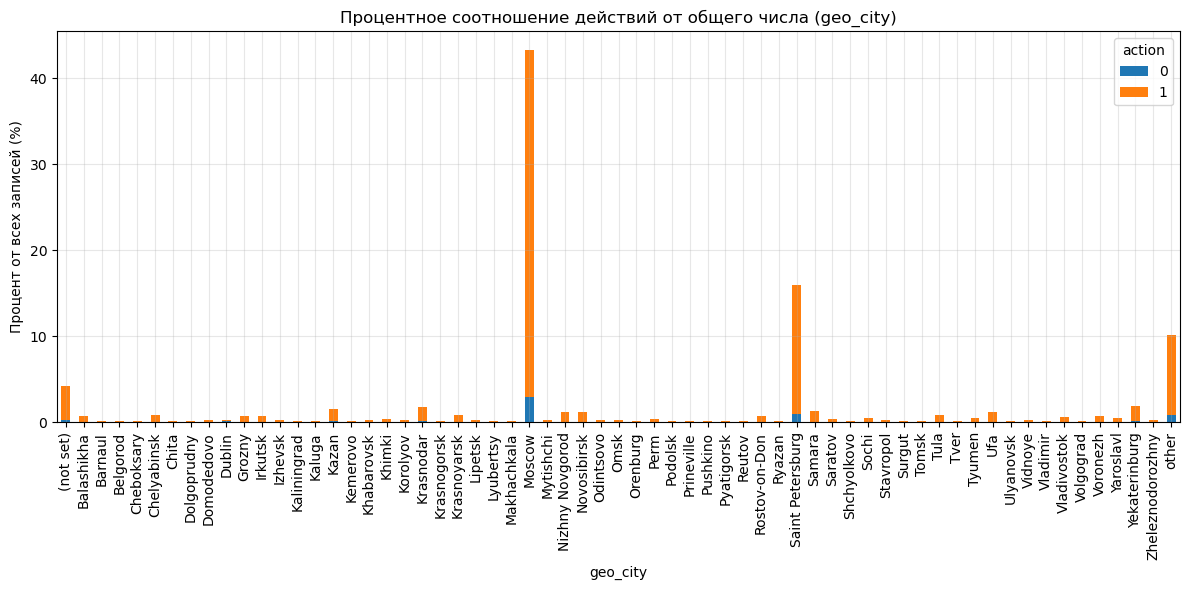

In [210]:
cat_cols = ['visit_date', 'visit_time','visit_number', 'utm_medium', 'device_category', 'utm_source', 'utm_campaign', 'utm_adcontent', 'device_brand', 'device_screen_resolution', 'device_browser', 'geo_city']
for col in cat_cols:
    pivot = (pd.crosstab(data_sessions[col], data_sessions['action'], normalize='all') * 100).round(2)
    display(pivot)
    pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f"Процентное соотношение действий от общего числа ({col})")
    plt.ylabel("Процент от всех записей (%)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


 ####  На последок проведем корреляционный анализ, но так как большая часть признаков категориальная, то воспользуемся V-мерой Крамера

In [160]:
!pip install association-metrics -q

python(12530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [211]:
import association_metrics as am

data_sessions_cat = data_sessions.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(data_sessions_cat)

cramersv.fit()

,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
visit_date,1.000000,0.030051,0.047074,0.280070,0.317409,0.351501,0.307132,0.097416,0.107665,0.121140,0.073428,0.038093,0.106242
visit_time,0.030051,1.000000,0.024567,0.064561,0.097857,0.060249,0.055255,0.056971,0.047522,0.058691,0.021192,0.019625,0.072049
visit_number,0.047074,0.024567,1.000000,0.204181,0.180350,0.178604,0.118623,0.091559,0.073510,0.094542,0.060324,0.027613,0.075378
utm_source,0.280070,0.064561,0.204181,1.000000,0.733657,0.584880,0.657436,0.285225,0.255086,0.225490,0.315512,0.126014,0.162603
utm_medium,0.317409,0.097857,0.180350,0.733657,1.000000,0.625284,0.654079,0.268434,0.239669,0.090394,0.259399,0.038877,0.061271
utm_campaign,0.351501,0.060249,0.178604,0.584880,0.625284,1.000000,0.702076,0.224306,0.215261,0.177454,0.210934,0.049612,0.144416
utm_adcontent,0.307132,0.055255,0.118623,0.657436,0.654079,0.702076,1.000000,0.177749,0.182074,0.214852,0.150283,0.063216,0.190999
device_category,0.097416,0.056971,0.091559,0.285225,0.268434,0.224306,0.177749,1.000000,0.707655,0.706929,0.162021,0.052209,0.134600
device_brand,0.107665,0.047522,0.073510,0.255086,0.239669,0.215261,0.182074,0.707655,1.000000,0.841761,0.496396,0.046245,0.123748
device_screen_resolution,0.121140,0.058691,0.094542,0.225490,0.090394,0.177454,0.214852,0.706929,0.841761,1.000000,0.501184,0.126193,0.105323


## ИТОГ
- Был проведен первичный анализ датасета, обработаны пропуски и дубликаты, представлена визуализация и удалены неинформативные признаки.
- При создании модели рекомендую поиграться с функцией reduce_categories_by_coverage для уменьшения сложности и снижения переобучения модели.
- Анализ на кореляцию показал наличее зависимостей, что не скажется на ансамблевых моделях, но линейные модели(регрессия и нейросети) могут показывать плохие результаты 

In [ ]:
data_sessions.to_csv('data_sessions.csv', index=False)